In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv("A20000476_shahd_dataset.csv")

In [3]:
dataset.iloc[:, 1:] = dataset.iloc[:, 1:].apply(lambda x: x * 5 / x.max(), axis=0)
tnu = dataset.shape[0]
tni = dataset.shape[1] - 1
item_ratings_count = dataset.iloc[:, 1:].count()

In [4]:
dataset.head()

,Unnamed: 0,Grand Theft Auto V,The Witcher 3: Wild Hunt,Portal 2,Counter-Strike: Global Offensive,Tomb Raider (2013),Portal,Left 4 Dead 2,The Elder Scrolls V: Skyrim,Red Dead Redemption 2,BioShock Infinite
0,User_1,5.0,4.0,3.0,4.0,1.0,1.0,3.0,NaN,4.0,4.0
1,User_2,4.0,4.0,3.0,3.0,1.0,1.0,4.0,3.0,NaN,NaN
2,User_3,5.0,4.0,2.0,5.0,5.0,2.0,1.0,2.0,5.0,3.0
3,User_4,2.0,4.0,2.0,1.0,5.0,2.0,2.0,3.0,3.0,NaN
4,User_5,2.0,1.0,3.0,5.0,1.0,5.0,2.0,NaN,3.0,4.0


In [5]:
tnu

50

In [6]:
tni

10

In [7]:
item_ratings_count

,0
Grand Theft Auto V,45
The Witcher 3: Wild Hunt,41
Portal 2,47
Counter-Strike: Global Offensive,44
Tomb Raider (2013),44
Portal,48
Left 4 Dead 2,45
The Elder Scrolls V: Skyrim,40
Red Dead Redemption 2,44
BioShock Infinite,41


In [8]:
missing_ratings = dataset.iloc[:, 1:].isnull().sum(axis=1)
active_users = missing_ratings[(missing_ratings == 2) | (missing_ratings == 3) | (missing_ratings == 5)].index[:3]
U1, U2, U3 = active_users

item_missing_percentage = dataset.iloc[:, 1:].isnull().mean(axis=0) * 100
target_items = item_missing_percentage[(item_missing_percentage == 4) | (item_missing_percentage == 10)].index[:2]
I1, I2 = target_items

In [9]:
# Count co-rated for active users
co_rated_data = []
for active_user in active_users:
    active_user_ratings = dataset.iloc[active_user, 1:].notnull()
    for other_user in range(dataset.shape[0]):
        if active_user != other_user:
            other_user_ratings = dataset.iloc[other_user, 1:].notnull()
            co_rated_items = (active_user_ratings & other_user_ratings).sum()
            co_rated_data.append((co_rated_items, other_user_ratings.sum()))

In [10]:
co_rated_data

[(7, 9),
 (8, 10),
 (8, 9),
 (7, 9),
 (6, 8),
 (8, 10),
 (8, 10),
 (7, 9),
 (7, 8),
 (8, 9),
 (8, 10),
 (6, 7),
 (8, 9),
 (7, 9),
 (8, 10),
 (6, 8),
 (8, 10),
 (7, 8),
 (7, 8),
 (7, 9),
 (7, 9),
 (7, 9),
 (6, 8),
 (6, 7),
 (8, 10),
 (6, 7),
 (8, 10),
 (4, 5),
 (7, 9),
 (8, 10),
 (7, 9),
 (7, 9),
 (7, 9),
 (6, 8),
 (8, 9),
 (8, 10),
 (6, 8),
 (8, 10),
 (7, 9),
 (6, 8),
 (8, 10),
 (6, 8),
 (7, 8),
 (7, 9),
 (6, 8),
 (7, 9),
 (7, 9),
 (8, 10),
 (7, 8),
 (8, 9),
 (6, 8),
 (8, 10),
 (7, 9),
 (8, 9),
 (8, 10),
 (8, 10),
 (7, 9),
 (6, 8),
 (7, 9),
 (8, 10),
 (5, 7),
 (7, 9),
 (7, 9),
 (8, 10),
 (6, 8),
 (8, 10),
 (7, 8),
 (6, 8),
 (7, 9),
 (7, 9),
 (7, 9),
 (7, 8),
 (5, 7),
 (8, 10),
 (5, 7),
 (8, 10),
 (4, 5),
 (7, 9),
 (8, 10),
 (8, 9),
 (7, 9),
 (7, 9),
 (7, 8),
 (7, 9),
 (8, 10),
 (7, 8),
 (8, 10),
 (7, 9),
 (7, 8),
 (8, 10),
 (7, 8),
 (7, 8),
 (7, 9),
 (6, 8),
 (7, 9),
 (7, 9),
 (8, 10),
 (6, 8),
 (7, 9),
 (7, 8),
 (8, 10),
 (8, 9),
 (7, 9),
 (6, 8),
 (8, 10),
 (8, 10),
 (7, 9),
 (7, 9),

In [13]:
# Create 2D array
co_rated_array = np.array(co_rated_data, dtype=[('No_common_users', int), ('No_coRated_items', int)])
co_rated_array = np.sort(co_rated_array, order='No_common_users')[::-1]
co_rated_array


array([(8, 10), (8, 10), (8, 10), (8, 10), (8, 10), (8, 10), (8, 10),
       (8, 10), (8, 10), (8, 10), (8, 10), (8, 10), (8, 10), (8, 10),
       (8, 10), (8, 10), (8, 10), (8, 10), (8, 10), (8, 10), (8, 10),
       (8, 10), (8, 10), (8, 10), (8, 10), (8, 10), (8, 10), (8, 10),
       (8, 10), (8, 10), (8, 10), (8, 10), (8, 10), (8, 10), (8, 10),
       (8, 10), (8, 10), (8, 10), (8, 10), (8,  9), (8,  9), (8,  9),
       (8,  9), (8,  9), (8,  9), (8,  9), (8,  9), (8,  9), (8,  9),
       (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9),
       (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9),
       (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9),
       (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9),
       (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9),
       (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  9),
       (7,  9), (7,  9), (7,  9), (7,  9), (7,  9), (7,  8), (7,  8),
       (7,  8), (7, 

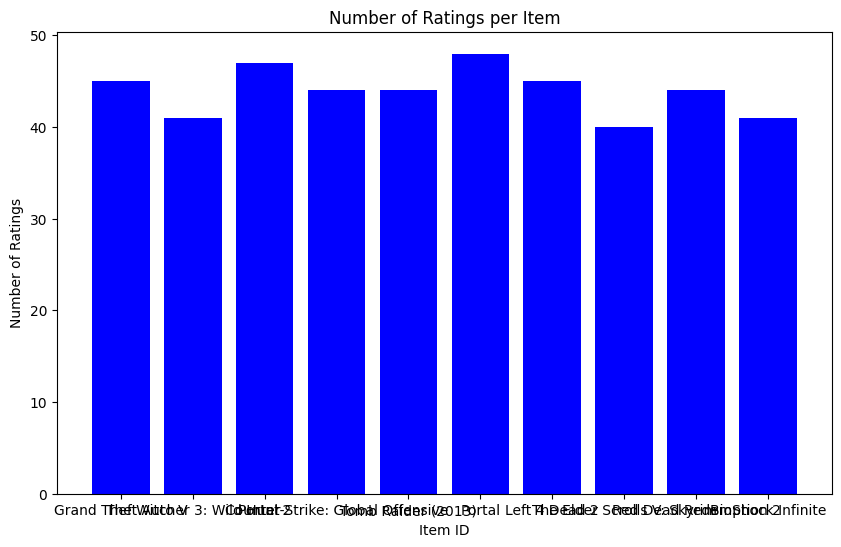

In [14]:
# Plot the number of ratings for every item
plt.figure(figsize=(10, 6))
plt.bar(item_ratings_count.index, item_ratings_count.values, color='blue')
plt.xlabel('Item ID')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings per Item')
plt.show()

In [24]:
# Determine threshold for maximum co-rated users for active users
thresholds = {}
for active_user in active_users:
    active_user_ratings = dataset.iloc[active_user, 1:].notnull()
    thresholds[active_user] = max(
        [(active_user_ratings & dataset.iloc[other_user, 1:].notnull()).sum()
         for other_user in range(dataset.shape[0]) if active_user != other_user]
    )

thresholds

{1: 8, 5: 8, 9: 8}

In [19]:
similarity_matrix = cosine_similarity(dataset.iloc[:, 1:].fillna(0))

# top 20% closest for each active user
closest_users = {}
for active_user in active_users:
    user_similarities = similarity_matrix[active_user]
    top_20_percent = int(np.ceil(0.2 * len(user_similarities)))
    closest_users[active_user] = np.argsort(user_similarities)[-top_20_percent:][::-1]

# Predict ratings for unseen items for active users
predictions = {}
for active_user in active_users:
    user_similarities = similarity_matrix[active_user]
    for item in dataset.columns[1:]:
        if pd.isna(dataset.loc[active_user, item]):
            weighted_sum = sum(
                user_similarities[other_user] * dataset.loc[other_user, item]
                for other_user in closest_users[active_user]
                if not pd.isna(dataset.loc[other_user, item])
            )
            similarity_sum = sum(
                user_similarities[other_user]
                for other_user in closest_users[active_user]
                if not pd.isna(dataset.loc[other_user, item])
            )
            predictions[(active_user, item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

# (DF) and (DS)
discounted_similarities = {}
threshold = 3
for active_user in active_users:
    discounted_similarities[active_user] = {
        other_user: user_similarities[other_user] * (1 - abs(user_similarities[other_user] - threshold) / threshold)
        for other_user in range(len(user_similarities)) if active_user != other_user
    }


In [22]:
# top 20% closest on discounted similarity
discounted_closest_users = {}
for active_user in active_users:
    user_ds = list(discounted_similarities[active_user].values())
    top_20_percent = int(np.ceil(0.2 * len(user_ds)))
    discounted_closest_users[active_user] = np.argsort(user_ds)[-top_20_percent:][::-1]

# Predict ratings using discounted similarity
discounted_predictions = {}
for active_user in active_users:
    for item in dataset.columns[1:]:
        if pd.isna(dataset.loc[active_user, item]):
            weighted_sum = sum(
                discounted_similarities[active_user][other_user] * dataset.loc[other_user, item]
                for other_user in discounted_closest_users[active_user]
                if not pd.isna(dataset.loc[other_user, item])
            )
            similarity_sum = sum(
                discounted_similarities[active_user][other_user]
                for other_user in discounted_closest_users[active_user]
                if not pd.isna(dataset.loc[other_user, item])
            )
            discounted_predictions[(active_user, item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

print("Regular Predictions:", predictions)
print("Discounted Predictions:", discounted_predictions)




Regular Predictions: {(1, 'Red Dead Redemption 2'): 2.1135689039783228, (1, 'BioShock Infinite'): 1.9938066783599824, (5, 'Portal 2'): 2.603350556471341, (5, 'The Elder Scrolls V: Skyrim'): 1.8322845160111598, (9, 'Left 4 Dead 2'): 1.7501860645634655, (9, 'BioShock Infinite'): 2.8745923648216642}
Discounted Predictions: {(1, 'Red Dead Redemption 2'): 3.2154591925013554, (1, 'BioShock Infinite'): 3.074785099986286, (5, 'Portal 2'): 3.5122909058776814, (5, 'The Elder Scrolls V: Skyrim'): 2.333112196362178, (9, 'Left 4 Dead 2'): 2.5517715065535485, (9, 'BioShock Infinite'): 3.348320215484072}


In [25]:
mean_centered_data = dataset.iloc[:, 1:].sub(dataset.iloc[:, 1:].mean(axis=1), axis=0).fillna(0)
mean_centered_similarity = cosine_similarity(mean_centered_data)

# top 20% using mean-centered
mean_centered_closest_users = {}
for active_user in active_users:
    user_similarities = mean_centered_similarity[active_user]
    top_20_percent = int(np.ceil(0.2 * len(user_similarities)))
    mean_centered_closest_users[active_user] = np.argsort(user_similarities)[-top_20_percent:][::-1]

# Predict ratings using mean-centered similarity
mean_centered_predictions = {}
for active_user in active_users:
    user_similarities = mean_centered_similarity[active_user]
    for item in dataset.columns[1:]:
        if pd.isna(dataset.loc[active_user, item]):
            weighted_sum = sum(
                user_similarities[other_user] * mean_centered_data.loc[other_user, item]
                for other_user in mean_centered_closest_users[active_user]
                if not pd.isna(dataset.loc[other_user, item])
            )
            similarity_sum = sum(
                user_similarities[other_user]
                for other_user in mean_centered_closest_users[active_user]
                if not pd.isna(dataset.loc[other_user, item])
            )
            mean_centered_predictions[(active_user, item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

# (DF) and (DS)
discounted_similarities = {}
threshold = 3
for active_user in active_users:
    discounted_similarities[active_user] = {
        other_user: user_similarities[other_user] * (1 - abs(user_similarities[other_user] - threshold) / threshold)
        for other_user in range(len(user_similarities)) if active_user != other_user
    }


In [26]:
# top 20% closest users based on discounted similarity
discounted_closest_users = {}
for active_user in active_users:
    user_ds = list(discounted_similarities[active_user].values())
    top_20_percent = int(np.ceil(0.2 * len(user_ds)))
    discounted_closest_users[active_user] = np.argsort(user_ds)[-top_20_percent:][::-1]

# Predict ratings using discounted similarity
discounted_predictions = {}
for active_user in active_users:
    for item in dataset.columns[1:]:
        if pd.isna(dataset.loc[active_user, item]):
            weighted_sum = sum(
                discounted_similarities[active_user][other_user] * dataset.loc[other_user, item]
                for other_user in discounted_closest_users[active_user]
                if not pd.isna(dataset.loc[other_user, item])
            )
            similarity_sum = sum(
                discounted_similarities[active_user][other_user]
                for other_user in discounted_closest_users[active_user]
                if not pd.isna(dataset.loc[other_user, item])
            )
            discounted_predictions[(active_user, item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

# Compare results
print("Regular Predictions:", predictions)
print("Mean-Centered Predictions:", mean_centered_predictions)
print("Discounted Predictions:", discounted_predictions)


Regular Predictions: {(1, 'Red Dead Redemption 2'): 2.1135689039783228, (1, 'BioShock Infinite'): 1.9938066783599824, (5, 'Portal 2'): 2.603350556471341, (5, 'The Elder Scrolls V: Skyrim'): 1.8322845160111598, (9, 'Left 4 Dead 2'): 1.7501860645634655, (9, 'BioShock Infinite'): 2.8745923648216642}
Mean-Centered Predictions: {(1, 'Red Dead Redemption 2'): -0.05696564264304768, (1, 'BioShock Infinite'): 0.5074546065119246, (5, 'Portal 2'): -0.08255161725331214, (5, 'The Elder Scrolls V: Skyrim'): -1.08018261013289, (9, 'Left 4 Dead 2'): 0.3578738770029448, (9, 'BioShock Infinite'): -0.33442891629578164}
Discounted Predictions: {(1, 'Red Dead Redemption 2'): 2.446339241237396, (1, 'BioShock Infinite'): 1.8516817104151249, (5, 'Portal 2'): 3.4009656780369135, (5, 'The Elder Scrolls V: Skyrim'): 2.1852311826727453, (9, 'Left 4 Dead 2'): 3.9448223268540192, (9, 'BioShock Infinite'): 1.820962997601901}


In [27]:
mean_adjusted_data = dataset.iloc[:, 1:].apply(lambda row: row - row.mean(), axis=1)
pearson_similarity = cosine_similarity(mean_adjusted_data.fillna(0))

# top 20% closest users using Pearson similarity
pearson_closest_users = {}
for active_user in active_users:
    user_similarities = pearson_similarity[active_user]
    top_20_percent = int(np.ceil(0.2 * len(user_similarities)))
    pearson_closest_users[active_user] = np.argsort(user_similarities)[-top_20_percent:][::-1]

# Predict ratings using Pearson similarity
pearson_predictions = {}
for active_user in active_users:
    user_similarities = pearson_similarity[active_user]
    for item in dataset.columns[1:]:
        if pd.isna(dataset.loc[active_user, item]):
            weighted_sum = sum(
                user_similarities[other_user] * mean_adjusted_data.loc[other_user, item]
                for other_user in pearson_closest_users[active_user]
                if not pd.isna(dataset.loc[other_user, item])
            )
            similarity_sum = sum(
                user_similarities[other_user]
                for other_user in pearson_closest_users[active_user]
                if not pd.isna(dataset.loc[other_user, item])
            )
            pearson_predictions[(active_user, item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

# Compare results
print("Regular Predictions:", predictions)
print("Mean-Centered Predictions:", mean_centered_predictions)
print("Discounted Predictions:", discounted_predictions)


Regular Predictions: {(1, 'Red Dead Redemption 2'): 2.1135689039783228, (1, 'BioShock Infinite'): 1.9938066783599824, (5, 'Portal 2'): 2.603350556471341, (5, 'The Elder Scrolls V: Skyrim'): 1.8322845160111598, (9, 'Left 4 Dead 2'): 1.7501860645634655, (9, 'BioShock Infinite'): 2.8745923648216642}
Mean-Centered Predictions: {(1, 'Red Dead Redemption 2'): -0.05696564264304768, (1, 'BioShock Infinite'): 0.5074546065119246, (5, 'Portal 2'): -0.08255161725331214, (5, 'The Elder Scrolls V: Skyrim'): -1.08018261013289, (9, 'Left 4 Dead 2'): 0.3578738770029448, (9, 'BioShock Infinite'): -0.33442891629578164}
Discounted Predictions: {(1, 'Red Dead Redemption 2'): 2.446339241237396, (1, 'BioShock Infinite'): 1.8516817104151249, (5, 'Portal 2'): 3.4009656780369135, (5, 'The Elder Scrolls V: Skyrim'): 2.1852311826727453, (9, 'Left 4 Dead 2'): 3.9448223268540192, (9, 'BioShock Infinite'): 1.820962997601901}


In [30]:
# Compute item-item cosine similarity
item_data = dataset.iloc[:, 1:].fillna(0).T
item_similarity = cosine_similarity(item_data)

# Convert similarity matrix
item_similarity_df = pd.DataFrame(item_similarity, index=dataset.columns[1:], columns=dataset.columns[1:])

#top 25% closest items to each target item
closest_items = {}
top_25_percent = int(np.ceil(0.25 * len(item_similarity_df)))
for target_item in target_items:
    closest_items[target_item] = item_similarity_df[target_item].nlargest(top_25_percent + 1).iloc[1:].index.tolist()

#  Predict missing ratings for each target item using closest items
item_predictions = {}
for target_item in target_items:
    for user in dataset.index:
        if pd.isna(dataset.loc[user, target_item]):
            weighted_sum = sum(
                item_similarity_df[target_item][other_item] * dataset.loc[user, other_item]
                for other_item in closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            similarity_sum = sum(
                item_similarity_df[target_item][other_item]
                for other_item in closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            item_predictions[(user, target_item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

# (DF) and  (DS)
threshold = 8
discounted_item_similarity = {}
for target_item in target_items:
    discounted_item_similarity[target_item] = {
        other_item: item_similarity_df[target_item][other_item] * (1 - abs(item_similarity_df[target_item][other_item] - threshold) / threshold)
        for other_item in item_similarity_df.index if target_item != other_item
    }


In [31]:
# top 20% closest items using discounted similarity
discounted_closest_items = {}
top_20_percent = int(np.ceil(0.2 * len(item_similarity_df)))
for target_item in target_items:
    discounted_closest_items[target_item] = (
        pd.Series(discounted_item_similarity[target_item])
        .nlargest(top_20_percent)
        .index.tolist()
    )

#Predict missing ratings using discounted similarity
discounted_item_predictions = {}
for target_item in target_items:
    for user in dataset.index:
        if pd.isna(dataset.loc[user, target_item]):
            weighted_sum = sum(
                discounted_item_similarity[target_item][other_item] * dataset.loc[user, other_item]
                for other_item in discounted_closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            similarity_sum = sum(
                discounted_item_similarity[target_item][other_item]
                for other_item in discounted_closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            discounted_item_predictions[(user, target_item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

# Compare results (regular vs. discounted)
print("Regular Predictions:", item_predictions)
print("Discounted Predictions:", discounted_item_predictions)

#Compare missing rating predictions
comparison_results = {
    "Regular vs Discounted": {
        "Same": sum(item_predictions[k] == discounted_item_predictions[k] for k in item_predictions.keys()),
        "Different": sum(item_predictions[k] != discounted_item_predictions[k] for k in item_predictions.keys()),
    }
}

print("Comparison Results:", comparison_results)

Regular Predictions: {(8, 'Grand Theft Auto V'): 2.331533498194955, (19, 'Grand Theft Auto V'): 1.6852306741161576, (23, 'Grand Theft Auto V'): 3.0168574648722877, (24, 'Grand Theft Auto V'): 2.6268388990601172, (37, 'Grand Theft Auto V'): 2.6879304268237254, (28, 'Portal'): 5.0, (49, 'Portal'): 2.4902722076112442}
Discounted Predictions: {(8, 'Grand Theft Auto V'): 2.0247641821172984, (19, 'Grand Theft Auto V'): 2.0247641821172984, (23, 'Grand Theft Auto V'): 4.0, (24, 'Grand Theft Auto V'): 1.4876179089413508, (37, 'Grand Theft Auto V'): 3.487617908941351, (28, 'Portal'): 5.0, (49, 'Portal'): 2.480551776759652}
Comparison Results: {'Regular vs Discounted': {'Same': 1, 'Different': 6}}


In [32]:
# Case Study 2.2.1: Compute item-item cosine similarity considering bias adjustment with mean-centering
item_data = dataset.iloc[:, 1:]
mean_centered_data = item_data.sub(item_data.mean(axis=0), axis=1).fillna(0).T  # Mean-centering and transposing
item_similarity = cosine_similarity(mean_centered_data)

# Convert similarity matrix to DataFrame for easier handling
item_similarity_df = pd.DataFrame(item_similarity, index=dataset.columns[1:], columns=dataset.columns[1:])

# Case Study 2.2.2: Determine top 20% closest items to each target item using cosine similarity
closest_items = {}
top_20_percent = int(np.ceil(0.2 * len(item_similarity_df)))
for target_item in target_items:
    closest_items[target_item] = item_similarity_df[target_item].nlargest(top_20_percent + 1).iloc[1:].index.tolist()

# Case Study 2.2.3: Predict missing ratings for each target item using closest items
item_predictions = {}
for target_item in target_items:
    for user in dataset.index:
        if pd.isna(dataset.loc[user, target_item]):
            weighted_sum = sum(
                item_similarity_df[target_item][other_item] * dataset.loc[user, other_item]
                for other_item in closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            similarity_sum = sum(
                item_similarity_df[target_item][other_item]
                for other_item in closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            item_predictions[(user, target_item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

# (DF) and  (DS)
threshold = 8
discounted_item_similarity = {}
for target_item in target_items:
    discounted_item_similarity[target_item] = {
        other_item: item_similarity_df[target_item][other_item] * (1 - abs(item_similarity_df[target_item][other_item] - threshold) / threshold)
        for other_item in item_similarity_df.index if target_item != other_item
    }


In [33]:
#  top 20% closest items using discounted similarity
discounted_closest_items = {}
for target_item in target_items:
    discounted_closest_items[target_item] = (
        pd.Series(discounted_item_similarity[target_item])
        .nlargest(top_20_percent)
        .index.tolist()
    )

# Predict missing ratings using discounted similarity
discounted_item_predictions = {}
for target_item in target_items:
    for user in dataset.index:
        if pd.isna(dataset.loc[user, target_item]):
            weighted_sum = sum(
                discounted_item_similarity[target_item][other_item] * dataset.loc[user, other_item]
                for other_item in discounted_closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            similarity_sum = sum(
                discounted_item_similarity[target_item][other_item]
                for other_item in discounted_closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            discounted_item_predictions[(user, target_item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

#Compare results (regular vs. discounted)
print("Regular Predictions:", item_predictions)
print("Discounted Predictions:", discounted_item_predictions)

# Compare missing rating predictions
comparison_results = {
    "Regular vs Discounted": {
        "Same": sum(item_predictions[k] == discounted_item_predictions[k] for k in item_predictions.keys()),
        "Different": sum(item_predictions[k] != discounted_item_predictions[k] for k in item_predictions.keys()),
    }
}

print("Comparison Results:", comparison_results)

Regular Predictions: {(8, 'Grand Theft Auto V'): 2.0895157321157387, (19, 'Grand Theft Auto V'): 1.0, (23, 'Grand Theft Auto V'): 2.9104842678842617, (24, 'Grand Theft Auto V'): 2.0, (37, 'Grand Theft Auto V'): 3.2736561785895075, (28, 'Portal'): 5.0, (49, 'Portal'): 2.591926753007221}
Discounted Predictions: {(8, 'Grand Theft Auto V'): 1.0, (19, 'Grand Theft Auto V'): 1.0, (23, 'Grand Theft Auto V'): 2.4958574151769386, (24, 'Grand Theft Auto V'): 2.0, (37, 'Grand Theft Auto V'): 2.9972382767846253, (28, 'Portal'): 4.0, (49, 'Portal'): 4.344140296294571}
Comparison Results: {'Regular vs Discounted': {'Same': 2, 'Different': 5}}


In [34]:
#Pearson Correlation Coefficient (PCC)
pcc_similarity = {}
for item1 in item_data.columns:
    for item2 in item_data.columns:
        if item1 != item2:
            common_users = ~item_data[[item1, item2]].isnull().any(axis=1)
            if common_users.sum() > 1:
                pcc_similarity[(item1, item2)] = pearsonr(
                    item_data.loc[common_users, item1],
                    item_data.loc[common_users, item2]
                )[0]
            else:
                pcc_similarity[(item1, item2)] = 0

# Convert PCC similarities to a DataFrame
pcc_similarity_df = pd.DataFrame(0, index=item_data.columns, columns=item_data.columns)
for (item1, item2), similarity in pcc_similarity.items():
    pcc_similarity_df.loc[item1, item2] = similarity

#  top 20% closest items to each target item using PCC
pcc_closest_items = {}
for target_item in target_items:
    pcc_closest_items[target_item] = (
        pcc_similarity_df[target_item].nlargest(top_20_percent + 1).iloc[1:].index.tolist()
    )

#  Predict missing ratings for each target item using PCC closest items
pcc_item_predictions = {}
for target_item in target_items:
    for user in dataset.index:
        if pd.isna(dataset.loc[user, target_item]):
            weighted_sum = sum(
                pcc_similarity_df[target_item][other_item] * dataset.loc[user, other_item]
                for other_item in pcc_closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            similarity_sum = sum(
                pcc_similarity_df[target_item][other_item]
                for other_item in pcc_closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            pcc_item_predictions[(user, target_item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

#  (DF) and  (DS) for PCC
pcc_discounted_similarity = {}
for target_item in target_items:
    pcc_discounted_similarity[target_item] = {
        other_item: pcc_similarity_df[target_item][other_item] * (1 - abs(pcc_similarity_df[target_item][other_item] - threshold) / threshold)
        for other_item in pcc_similarity_df.index if target_item != other_item
    }


<ipython-input-34-3bd5ef749f25>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-0.04915055109596433' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pcc_similarity_df.loc[item1, item2] = similarity
<ipython-input-34-3bd5ef749f25>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.03660369278279956' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pcc_similarity_df.loc[item1, item2] = similarity
<ipython-input-34-3bd5ef749f25>:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.0040061287234154155' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pcc_similarity_df.loc[item1, item2] = similarity
<ipython-input-34-3bd5ef7

In [35]:
#top 20% closest items using PCC discounted similarity
pcc_discounted_closest_items = {}
for target_item in target_items:
    pcc_discounted_closest_items[target_item] = (
        pd.Series(pcc_discounted_similarity[target_item])
        .nlargest(top_20_percent)
        .index.tolist()
    )

# Predict missing ratings using PCC discounted similarity
pcc_discounted_item_predictions = {}
for target_item in target_items:
    for user in dataset.index:
        if pd.isna(dataset.loc[user, target_item]):
            weighted_sum = sum(
                pcc_discounted_similarity[target_item][other_item] * dataset.loc[user, other_item]
                for other_item in pcc_discounted_closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            similarity_sum = sum(
                pcc_discounted_similarity[target_item][other_item]
                for other_item in pcc_discounted_closest_items[target_item]
                if not pd.isna(dataset.loc[user, other_item])
            )
            pcc_discounted_item_predictions[(user, target_item)] = weighted_sum / similarity_sum if similarity_sum > 0 else 0

print("PCC Regular Predictions:", pcc_item_predictions)
print("PCC Discounted Predictions:", pcc_discounted_item_predictions)

comparison_summary = {
    "Case Study 2.2 vs 2.3": {
        "Regular": {
            "Same": sum(item_predictions[k] == pcc_item_predictions[k] for k in item_predictions.keys()),
            "Different": sum(item_predictions[k] != pcc_item_predictions[k] for k in item_predictions.keys()),
        },
        "Discounted": {
            "Same": sum(discounted_item_predictions[k] == pcc_discounted_item_predictions[k] for k in discounted_item_predictions.keys()),
            "Different": sum(discounted_item_predictions[k] != pcc_discounted_item_predictions[k] for k in discounted_item_predictions.keys()),
        }
    }
}

print("Comparison Summary:", comparison_summary)

PCC Regular Predictions: {(8, 'Grand Theft Auto V'): 2.5066975438040116, (19, 'Grand Theft Auto V'): 1.9955349707973256, (23, 'Grand Theft Auto V'): 2.9910699415946507, (24, 'Grand Theft Auto V'): 2.4977674853986627, (37, 'Grand Theft Auto V'): 2.0, (28, 'Portal'): 5.0, (49, 'Portal'): 2.4605920522868776}
PCC Discounted Predictions: {(8, 'Grand Theft Auto V'): 1.0, (19, 'Grand Theft Auto V'): 1.0, (23, 'Grand Theft Auto V'): 2.4422325421718165, (24, 'Grand Theft Auto V'): 2.0, (37, 'Grand Theft Auto V'): 2.9614883614478775, (28, 'Portal'): 4.0, (49, 'Portal'): 4.540914728461311}
Comparison Summary: {'Case Study 2.2 vs 2.3': {'Regular': {'Same': 1, 'Different': 6}, 'Discounted': {'Same': 4, 'Different': 3}}}
